In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
titanic = pd.read_csv('titanic.csv')

In [4]:
mean_age = titanic['age'].mean()

In [5]:
mean_age

29.851834162679427

In [7]:
titanic['age'] = titanic['age'].fillna(mean_age)
# feature engineering

In [8]:
titanic['age']

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1303    14.500000
1304    29.851834
1305    26.500000
1306    27.000000
1307    29.000000
Name: age, Length: 1308, dtype: float64

In [9]:
crime = pd.read_csv('crime.csv')

In [11]:
crime.head()

,occurrencedate,reporteddate,Lat,Long,Neighbourhood,premisetype,MCI
0,2014-08-25T04:00:00.000Z,2014-08-25T04:00:00.000Z,43.768829,-79.520401,Black Creek (24),Outside,Assault
1,2014-08-25T04:00:00.000Z,2014-09-08T04:00:00.000Z,43.642574,-79.580856,Eringate-Centennial-West Deane (11),House,Break and Enter
2,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,43.762909,-79.260445,Bendale (127),House,Assault
3,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,43.663208,-79.367546,Cabbagetown-South St.James Town (71),Commercial,Break and Enter
4,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,43.776440,-79.231758,Woburn (137),Other,Break and Enter


In [22]:
crime.info()
# we need to change the 'occurrencedate' from object to numeric value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131073 entries, 0 to 131072
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   occurrencedate  131073 non-null  object             
 1   reporteddate    131073 non-null  object             
 2   Lat             131073 non-null  float64            
 3   Long            131073 non-null  float64            
 4   Neighbourhood   131073 non-null  object             
 5   premisetype     131073 non-null  object             
 6   MCI             131073 non-null  object             
 7   datetime        131073 non-null  datetime64[ns, UTC]
 8   year            131073 non-null  int32              
 9   month           131073 non-null  int32              
 10  dayofweek       131073 non-null  int32              
 11  hour            131073 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(4), object(5)
memory usage:

In [13]:
crime['datetime'] = pd.to_datetime(crime['occurrencedate'])

In [14]:
crime['datetime']

0        2014-08-25 04:00:00+00:00
1        2014-08-25 04:00:00+00:00
2        2014-08-25 04:00:00+00:00
3        2014-08-25 04:00:00+00:00
4        2014-08-25 04:00:00+00:00
                    ...           
131068   2014-09-18 04:00:00+00:00
131069   2014-09-20 04:00:00+00:00
131070   2014-09-22 04:00:00+00:00
131071   2014-09-21 04:00:00+00:00
131072   2014-09-22 04:00:00+00:00
Name: datetime, Length: 131073, dtype: datetime64[ns, UTC]

In [31]:
crime['year'] = crime['datetime'].dt.year
crime['year']

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
131068    2014
131069    2014
131070    2014
131071    2014
131072    2014
Name: year, Length: 131073, dtype: int32

In [16]:
crime['month'] = crime['datetime'].dt.month
crime['month']

0         8
1         8
2         8
3         8
4         8
         ..
131068    9
131069    9
131070    9
131071    9
131072    9
Name: month, Length: 131073, dtype: int32

In [17]:
crime['dayofweek'] = crime['datetime'].dt.dayofweek
crime['dayofweek']

0         0
1         0
2         0
3         0
4         0
         ..
131068    3
131069    5
131070    0
131071    6
131072    0
Name: dayofweek, Length: 131073, dtype: int32

In [18]:
crime['hour']=crime['datetime'].dt.hour
crime['hour']

0         4
1         4
2         4
3         4
4         4
         ..
131068    4
131069    4
131070    4
131071    4
131072    4
Name: hour, Length: 131073, dtype: int32

In [25]:
crime.describe()

,Lat,Long,year,month,dayofweek,hour
count,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000
mean,43.708025,-79.394158,2015.492184,6.654139,3.074912,4.332334
std,0.052587,0.105263,1.282269,3.392123,1.996135,0.471052
min,43.587093,-79.635239,1966.000000,1.000000,0.000000,4.000000
25%,43.661774,-79.473244,2015.000000,4.000000,1.000000,4.000000
50%,43.702255,-79.393280,2016.000000,7.000000,3.000000,4.000000
75%,43.752491,-79.315636,2017.000000,10.000000,5.000000,5.000000
max,43.847954,-79.123100,2017.000000,12.000000,6.000000,5.000000


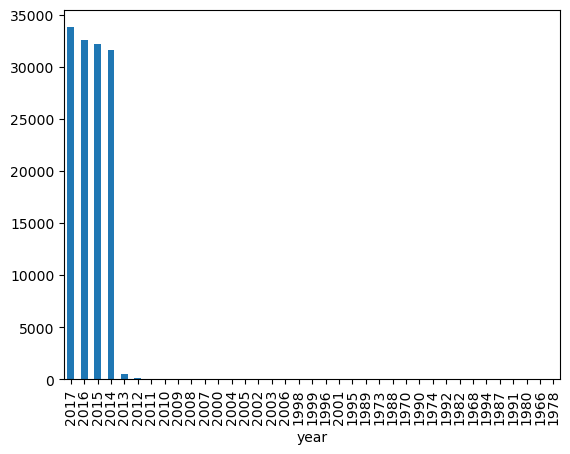

In [26]:
crime['year'].value_counts().plot(kind='bar');

In [33]:
# filter the dataframe for only years greater than or equal to 2014

crime = crime[crime['year']>=2014]

In [34]:
crime.head()

,occurrencedate,reporteddate,Lat,Long,Neighbourhood,premisetype,MCI,datetime,year,month,dayofweek,hour
0,2014-08-25T04:00:00.000Z,2014-08-25T04:00:00.000Z,43.768829,-79.520401,Black Creek (24),Outside,Assault,2014-08-25 04:00:00+00:00,2014,8,0,4
1,2014-08-25T04:00:00.000Z,2014-09-08T04:00:00.000Z,43.642574,-79.580856,Eringate-Centennial-West Deane (11),House,Break and Enter,2014-08-25 04:00:00+00:00,2014,8,0,4
2,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,43.762909,-79.260445,Bendale (127),House,Assault,2014-08-25 04:00:00+00:00,2014,8,0,4
3,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,43.663208,-79.367546,Cabbagetown-South St.James Town (71),Commercial,Break and Enter,2014-08-25 04:00:00+00:00,2014,8,0,4
4,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,43.776440,-79.231758,Woburn (137),Other,Break and Enter,2014-08-25 04:00:00+00:00,2014,8,0,4


In [35]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130167 entries, 0 to 131072
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   occurrencedate  130167 non-null  object             
 1   reporteddate    130167 non-null  object             
 2   Lat             130167 non-null  float64            
 3   Long            130167 non-null  float64            
 4   Neighbourhood   130167 non-null  object             
 5   premisetype     130167 non-null  object             
 6   MCI             130167 non-null  object             
 7   datetime        130167 non-null  datetime64[ns, UTC]
 8   year            130167 non-null  int32              
 9   month           130167 non-null  int32              
 10  dayofweek       130167 non-null  int32              
 11  hour            130167 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(4), object(5)
memory usage: 10.9

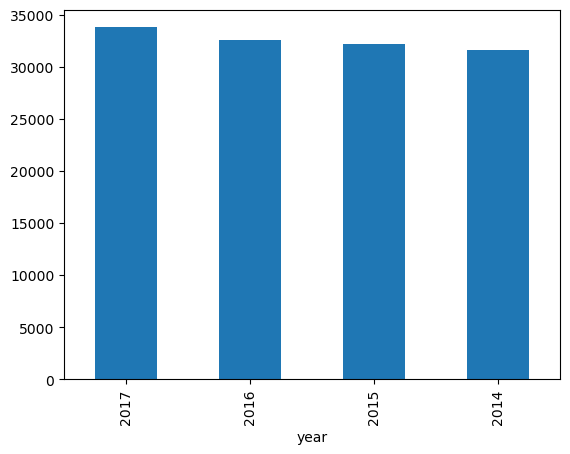

In [36]:
crime['year'].value_counts().plot(kind='bar');

In [19]:
titanic.info()
# using sklearn do to machine learning part, 
# require no missing values and has to be numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1308 non-null   int64  
 1   survived   1308 non-null   int64  
 2   name       1308 non-null   object 
 3   sex        1308 non-null   object 
 4   age        1308 non-null   float64
 5   sibsp      1308 non-null   int64  
 6   parch      1308 non-null   int64  
 7   ticket     1308 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       486 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [21]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
dtype: int64

In [57]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
titanic[features]
titanic[features].isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [58]:
titanic[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1308 non-null   int64  
 1   sex     1308 non-null   object 
 2   age     1308 non-null   float64
 3   sibsp   1308 non-null   int64  
 4   parch   1308 non-null   int64  
 5   fare    1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


In [67]:
# select features (X)
# one hot encode any categorical columns (feature engineering)
X = pd.get_dummies(titanic[features], drop_first = True).astype(int)
# select label (y)
y = titanic['survived']
# pclass, sex, age, sibsp, parch, fare

In [68]:
X

,pclass,age,sibsp,parch,fare,sex_male
0,1,29,0,0,211,0
1,1,0,1,2,151,1
2,1,2,1,2,151,0
3,1,30,1,2,151,1
4,1,25,1,2,151,0
...,...,...,...,...,...,...
1303,3,14,1,0,14,0
1304,3,29,1,0,14,0
1305,3,26,0,0,7,1
1306,3,27,0,0,7,1


In [72]:
# Use train test split to separate our data (X,y) into
# train features, train labels
# test features, test lebels
# random_state=1314
# test_size=0.33

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state=1314)


In [70]:
train_test_split? # to check the details

In [73]:
X_train.shape

(876, 6)

In [74]:
X_test.shape

(432, 6)

In [75]:
X_train

,pclass,age,sibsp,parch,fare,sex_male
721,3,36,0,0,7,1
158,1,55,0,0,50,1
1170,3,29,8,2,69,1
1199,3,29,0,0,8,1
529,2,50,0,1,26,0
...,...,...,...,...,...,...
103,1,38,0,0,227,0
1192,3,24,0,0,8,1
251,1,21,2,2,262,0
667,3,27,0,0,7,0


In [76]:
y_train.shape

(876,)

In [82]:
y_test.shape

(432,)

In [81]:
# select features (X)
# one hot encode any categorical columns (feature engineering)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[features], drop_first = True).astype(int)

# select label (y)
y = titanic['survived']

# Model validation (split data into train/test set)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state=1314)

# Pick a ML algorithm
model = DecisionTreeClassifier()

# train the model on training set
model.fit(X_train,y_train)

# Use the model to predict on test data
y_pred=model.predict(X_test)

# Model evaluation
accuracy_score(y_test,y_pred)

0.7685185185185185

## All steps

In [98]:

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[features], drop_first = True).astype(int)

y = titanic['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state=1314)

model = DecisionTreeClassifier(random_state=1314, max_depth=3, criterion='entropy') # criterion by default is gini

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy_score(y_test,y_pred)

0.8055555555555556

## How to make the model better

- Feature engineering*
- Feature selection
- Hyperparameter tuning (to avoid overfit or underfit)
- Pick a different ML algorithm

In [92]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

In [93]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[features], drop_first = True).astype(int)

y = titanic['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state=1314)

# model = DecisionTreeClassifier(random_state=1314, max_depth=3, criterion='entropy') # criterion by default is gini
model = RandomForestClassifier(random_state = 1314)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy_score(y_test,y_pred)

0.7986111111111112

## Encoding

- label encoding
- one hot encodinng

In [62]:
titanic['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1303    female
1304    female
1305      male
1306      male
1307      male
Name: sex, Length: 1308, dtype: object

In [66]:
pd.get_dummies(titanic['sex'], drop_first=True).astype(int)

,male
0,0
1,1
2,0
3,1
4,0
...,...
1303,0
1304,0
1305,1
1306,1


In [37]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

In [40]:
X,y = make_blobs(centers=[[1,1],[2,1]], random_state=1)
df = pd.DataFrame(X, columns = ['feature1', 'feature2']).assign(label=y)
df.head()

,feature1,feature2,label
0,0.471828,-0.072969,0
1,1.889553,0.382638,1
2,2.520576,-0.144341,1
3,1.819080,0.396079,1
4,4.190700,-0.896361,1


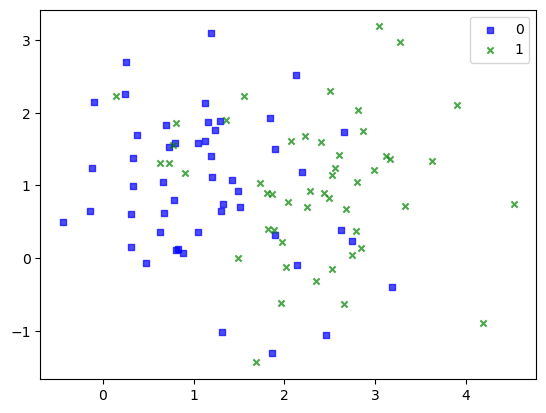

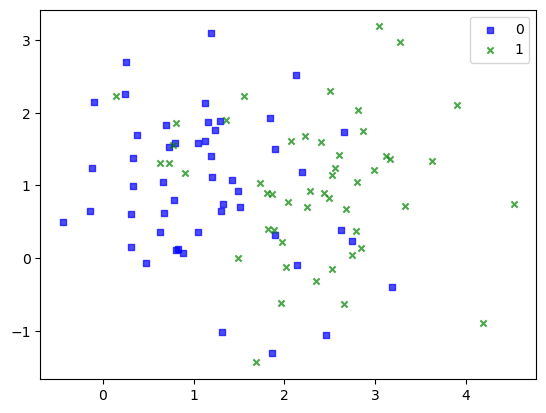

In [41]:
category_scatter(x='feature1',y='feature2',label_col='label',data=df)

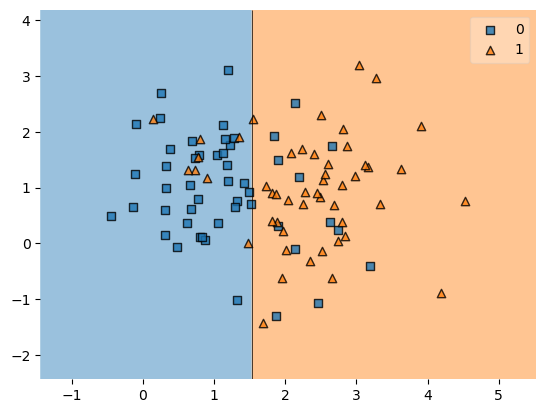

In [45]:
d_tree = DecisionTreeClassifier(max_depth=1)
d_tree.fit(X,y)

plot_decision_regions(X,y,clf=d_tree);

# underfitting

# hyperparameter (max_depth decision tree)
# hyperparameter tuning

In [47]:
!pip install graphviz


  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/18/79/12d3f468cc67a04d0db640bdd54913e60cd9828e3eada107d330d760d61a/graphviz-0.20.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.6 MB/s eta 0:00:00


In [48]:
import graphviz
from sklearn.tree import export_graphviz


In [51]:
dot_data = export_graphviz(d_tree, out_file=None, feature_names=['feature1', 'feature2'], filled=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the visualization as a file
graph.view()  # View the visualization

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

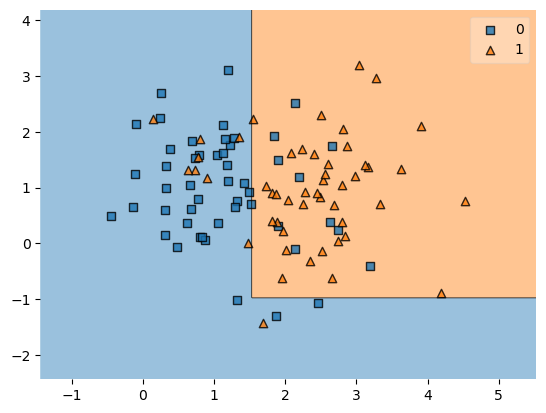

In [52]:
d_tree = DecisionTreeClassifier(max_depth=2)
d_tree.fit(X,y)

plot_decision_regions(X,y,clf=d_tree);

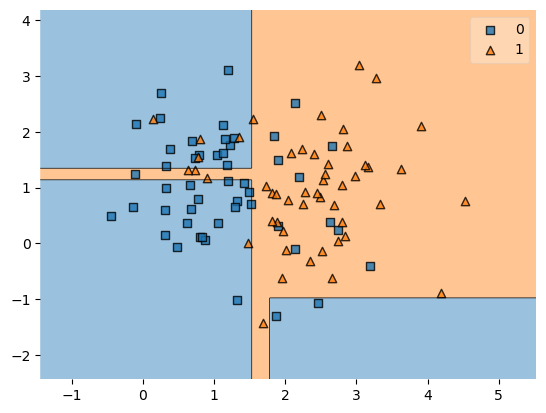

In [54]:
d_tree = DecisionTreeClassifier(max_depth=3)
d_tree.fit(X,y)

plot_decision_regions(X,y,clf=d_tree);

# overfitting the tree